# 本实验用于查看各种MCMC算法在 ESS 上的表现
包括
- SP(MH) 单建议
- MP 多建议
- PSP 预取单建议
- PMP 预取多建议

## 1. SP(MH) 单建议

100%|██████████| 1000/1000 [00:00<00:00, 52638.04it/s]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.  , -2.85, -2.7 , -2.55, -2.4 , -2.25, -2.1 , -1.95, -1.8 ,
        -1.65, -1.5 , -1.35, -1.2 , -1.05, -0.9 , -0.75, -0.6 , -0.45,
        -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,
         1.05,  1.2 ,  1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,
         2.4 ,  2.55,  2.7 ,  2.85,  3.  ]),
 array([-15.  , -14.45, -13.9 , -13.35, -12.8 , -12.25, -11.7 , -11.15,
        -10.6 , -10.05,  -9.5 ,  -8.95,  -8.4 ,  -7.85,  -7.3 ,  -6.75,
         -6.2 ,  -5.65,  -5.1 ,  -4.55,  -4.  ,  -3.45,  -2.9 ,  -2.35,
         -1.8 ,  -1.25,  -0.7 ,  -0.15,   0.4 ,   0.95,   1.5 ,   2.05,
          2.6 ,   3.15,   3.7 ,   4.25,   4.8 ,   5.35,   5.9 ,   6.45,
          7.  ]),
 <matplotlib.collections.QuadMesh at 0x18869

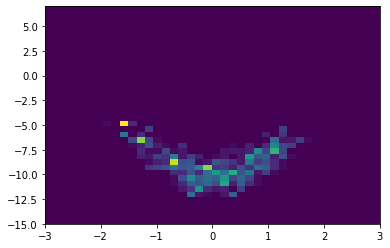

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# 正态分布概率密度函数计算
def banana_distribution(x):
    x1 = x[0]
    x2 = x[1]
    p = np.exp(-(x1**2)/2) * np.exp(-((x2 - 2*(x1**2 - 5))**2) / 2)
    return p
def move(x):
    x1 = x[0]+ np.random.normal()
    x2 = x[1]+ np.random.normal()
    return np.array([x1,x2])

def SP(hops,mu,sigma):
    states = [] 
    burn_in = int(0)
    current = np.array([0,-10])
    acc_num = 0
    rej_num = 0
    for i in tqdm(range(hops)):
        # 记录样本
        states.append(current)
        # 1.建议
        movement = move(current)
        
        # 2.计算接受率
        curr_prob = banana_distribution(x=current)
        move_prob = banana_distribution(x=movement)
        
        acceptance = move_prob/(curr_prob)
        # 3.判定是否接受
        event = random.uniform(0,1)
        if acceptance > event:
            current = movement
            acc_num = acc_num + 1
        else :
            rej_num = rej_num +1

   
    return states[:],acc_num

mu, sigma = 0,1
dist,acc_num = SP(1000,mu=mu,sigma=sigma)
dist = np.array(dist)

plt.xlim(-3,3)
plt.ylim(-15,7)
plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 31139.06it/s]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.  , -2.85, -2.7 , -2.55, -2.4 , -2.25, -2.1 , -1.95, -1.8 ,
        -1.65, -1.5 , -1.35, -1.2 , -1.05, -0.9 , -0.75, -0.6 , -0.45,
        -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,
         1.05,  1.2 ,  1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,
         2.4 ,  2.55,  2.7 ,  2.85,  3.  ]),
 array([-15.  , -14.45, -13.9 , -13.35, -12.8 , -12.25, -11.7 , -11.15,
        -10.6 , -10.05,  -9.5 ,  -8.95,  -8.4 ,  -7.85,  -7.3 ,  -6.75,
         -6.2 ,  -5.65,  -5.1 ,  -4.55,  -4.  ,  -3.45,  -2.9 ,  -2.35,
         -1.8 ,  -1.25,  -0.7 ,  -0.15,   0.4 ,   0.95,   1.5 ,   2.05,
          2.6 ,   3.15,   3.7 ,   4.25,   4.8 ,   5.35,   5.9 ,   6.45,
          7.  ]),
 <matplotlib.collections.QuadMesh at 0x2769f

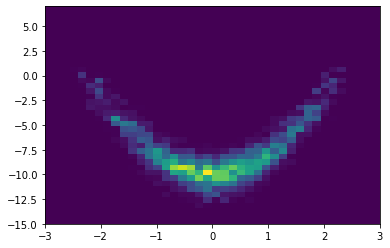

In [178]:
mu, sigma = 0,1
dist,acc_num = SP(10000,mu=mu,sigma=sigma)
dist = np.array(dist)

plt.xlim(-3,3)
plt.ylim(-15,7)
plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))

## 2. MP 多建议

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
import pandas as pd



def MP(hops, mu, sigma, N):
    
    d = 2
    I = 0
    X = np.empty([hops * (N + 1), d])
    X[0] = np.array([0,-10])
    Y = np.empty([N + 1, d])
    Y[0] = X[0]
    # generate N new points from the proposal 初始化产生N个建议值（可并行）
    for i in range(N):
        j = i + 1
        Y[j] = move(X[0])
    K = np.empty([N+1 , 1])
    A = np.empty([N+1 , 1])

    for i in tqdm(range(hops)):
        # 计算接受率（可并行）
        for j in range(N+1):
            temp = 1
            for k in range(N+1):
                K[k] = stats.norm.pdf(Y[j,0], Y[k,0])*stats.norm.pdf(Y[j,1], Y[k,1])
                if j!=k :
                    temp = K[k]*temp
            A[j, 0] = temp * banana_distribution(x=Y[j])
            
        # 根据接受率采样 
  
       
      
        
        B = pd.DataFrame(A.reshape(-1))
       

       
        
    
        index = pd.DataFrame(np.linspace(0, N, N + 1).astype(np.int32))
        X[i * N + i:(i + 1) * (N + 1)] = Y[index.sample(N+1,replace=True, weights=B[0]).values.reshape(-1)]
        
        # 重新产生N个建议值（可并行）
        I = np.random.choice(np.linspace( i*N+i, (i+1)*(N+1)-1, N+1).astype(np.int32), 1)
        Y[0] = X[I]
       
        for i in range(N):
            j = i + 1
            Y[j] = move(Y[0])
        

    return X#X[int(0.2*hops*(N+1)):]





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.74it/s]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.  , -2.85, -2.7 , -2.55, -2.4 , -2.25, -2.1 , -1.95, -1.8 ,
        -1.65, -1.5 , -1.35, -1.2 , -1.05, -0.9 , -0.75, -0.6 , -0.45,
        -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,
         1.05,  1.2 ,  1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,
         2.4 ,  2.55,  2.7 ,  2.85,  3.  ]),
 array([-15.  , -14.45, -13.9 , -13.35, -12.8 , -12.25, -11.7 , -11.15,
        -10.6 , -10.05,  -9.5 ,  -8.95,  -8.4 ,  -7.85,  -7.3 ,  -6.75,
         -6.2 ,  -5.65,  -5.1 ,  -4.55,  -4.  ,  -3.45,  -2.9 ,  -2.35,
         -1.8 ,  -1.25,  -0.7 ,  -0.15,   0.4 ,   0.95,   1.5 ,   2.05,
          2.6 ,   3.15,   3.7 ,   4.25,   4.8 ,   5.35,   5.9 ,   6.45,
          7.  ]),
 <matplotlib.collections.QuadMesh at 0x2769f

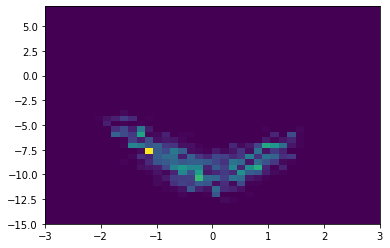

In [186]:
dist = MP(1000, mu=mu, sigma=sigma, N=3)
dist = np.array(dist)

plt.xlim(-3,3)
plt.ylim(-15,7)
plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:20<00:00, 123.99it/s]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.  , -2.85, -2.7 , -2.55, -2.4 , -2.25, -2.1 , -1.95, -1.8 ,
        -1.65, -1.5 , -1.35, -1.2 , -1.05, -0.9 , -0.75, -0.6 , -0.45,
        -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,
         1.05,  1.2 ,  1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,
         2.4 ,  2.55,  2.7 ,  2.85,  3.  ]),
 array([-15.  , -14.45, -13.9 , -13.35, -12.8 , -12.25, -11.7 , -11.15,
        -10.6 , -10.05,  -9.5 ,  -8.95,  -8.4 ,  -7.85,  -7.3 ,  -6.75,
         -6.2 ,  -5.65,  -5.1 ,  -4.55,  -4.  ,  -3.45,  -2.9 ,  -2.35,
         -1.8 ,  -1.25,  -0.7 ,  -0.15,   0.4 ,   0.95,   1.5 ,   2.05,
          2.6 ,   3.15,   3.7 ,   4.25,   4.8 ,   5.35,   5.9 ,   6.45,
          7.  ]),
 <matplotlib.collections.QuadMesh at 0x2769f

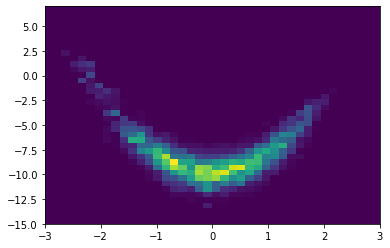

In [187]:
dist = MP(10000, mu=mu, sigma=sigma, N=3)
dist = np.array(dist)
plt.ylim(-15,7)
plt.xlim(-3,3)
plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))


## 4.PMP 预取多建议

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
import pandas as pd
import math



def PMP(hops, mu, sigma,N,deep):
    d = 2
    I = 0
    X = np.empty([hops * (N + 1)**deep, d])
    X[0] = np.array([0,-10])
    Y = np.empty([(N + 1)**deep, d])
   

    Y[0] = X[0]
    for dee in range(deep):
        temp = (N+1)**dee
        for j in range(N):
            for k in range(temp):
                Y[k+temp*(j+1)] = move(Y[k])

    
    for hop in tqdm(range(hops)):
        A = np.ones([(N + 1)**deep, 1])
        weights = np.empty([(N + 1) ** deep , 1])
        w_t = np.ones([N + 1, 1])
        # 1.计算接受率（可并行）
        ## 1.1 计算似然函数
        for all in range((N + 1) ** deep):
            weights[all, 0] = banana_distribution(Y[all])
        ## 1.2 计算接收概率
        for i in range(deep):
            temp = (N+1)**i
            for h in range((N+1)**i):
                for j in range(N+1):
                    w_t[j,0] = weights[h+j*temp,0]
                for j in range(N+1):
                    for k in range(N+1):
                        if j!=k:
                            w_t[j,0] = w_t[j,0] * stats.norm.pdf(Y[h+j*temp, 0], Y[h+k*temp, 0])* stats.norm.pdf(Y[h+j*temp, 1], Y[h+k*temp, 1])
                for j in range(N+1):
                    A[h+j*temp,0] =A[h+j*temp,0] * w_t[j,0]/w_t.sum()
            if i<deep-1:
                for l in range((N+1)**(i+2)-(N+1)**(i+1)):
                    A[l+(N+1)**(i+1),0] = A[(l+(N+1)**(i+1))%((N+1)*(i+1)),0]
                    

        B = pd.DataFrame(A.reshape(-1))
        index = pd.DataFrame(np.linspace(0, (N+1)**deep-1, (N+1)**deep).astype(np.int32))
        X[hop * (N+1)**deep:(hop+1) * (N+1)**deep] = Y[index.sample((N + 1)**deep, replace=True, weights=B[0]).values.reshape(-1)]
 
        # 重新产生N个建议值（可并行）
        I = np.random.choice(np.linspace(hop*(N+1)**deep,(hop+1)*(N+1)**deep-1,(N+1)**deep).astype(np.int32), 1)
        
        Y[0] = X[I]
        for dee in range(deep):
            temp = (N+1)**dee
            for j in range(N):
                for k in range(temp):
                    Y[k+temp*(j+1)] = move(Y[k])
                        

    return X


mu, sigma = 0, 1
dist = PMP(1000, mu=mu, sigma=sigma,N=3,deep=2)


100%|██████████| 1000/1000 [00:14<00:00, 69.27it/s]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.  , -2.85, -2.7 , -2.55, -2.4 , -2.25, -2.1 , -1.95, -1.8 ,
        -1.65, -1.5 , -1.35, -1.2 , -1.05, -0.9 , -0.75, -0.6 , -0.45,
        -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,
         1.05,  1.2 ,  1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,
         2.4 ,  2.55,  2.7 ,  2.85,  3.  ]),
 array([-15.  , -14.45, -13.9 , -13.35, -12.8 , -12.25, -11.7 , -11.15,
        -10.6 , -10.05,  -9.5 ,  -8.95,  -8.4 ,  -7.85,  -7.3 ,  -6.75,
         -6.2 ,  -5.65,  -5.1 ,  -4.55,  -4.  ,  -3.45,  -2.9 ,  -2.35,
         -1.8 ,  -1.25,  -0.7 ,  -0.15,   0.4 ,   0.95,   1.5 ,   2.05,
          2.6 ,   3.15,   3.7 ,   4.25,   4.8 ,   5.35,   5.9 ,   6.45,
          7.  ]),
 <matplotlib.collections.QuadMesh at 0x2769f

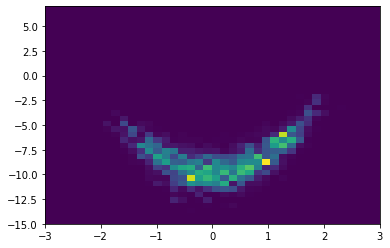

In [195]:

dist = np.array(dist)
plt.ylim(-15,7)
plt.xlim(-3,3)
plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:54<00:00, 42.65it/s]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.  , -2.85, -2.7 , -2.55, -2.4 , -2.25, -2.1 , -1.95, -1.8 ,
        -1.65, -1.5 , -1.35, -1.2 , -1.05, -0.9 , -0.75, -0.6 , -0.45,
        -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,
         1.05,  1.2 ,  1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,
         2.4 ,  2.55,  2.7 ,  2.85,  3.  ]),
 array([-15.  , -14.45, -13.9 , -13.35, -12.8 , -12.25, -11.7 , -11.15,
        -10.6 , -10.05,  -9.5 ,  -8.95,  -8.4 ,  -7.85,  -7.3 ,  -6.75,
         -6.2 ,  -5.65,  -5.1 ,  -4.55,  -4.  ,  -3.45,  -2.9 ,  -2.35,
         -1.8 ,  -1.25,  -0.7 ,  -0.15,   0.4 ,   0.95,   1.5 ,   2.05,
          2.6 ,   3.15,   3.7 ,   4.25,   4.8 ,   5.35,   5.9 ,   6.45,
          7.  ]),
 <matplotlib.collections.QuadMesh at 0x2769f

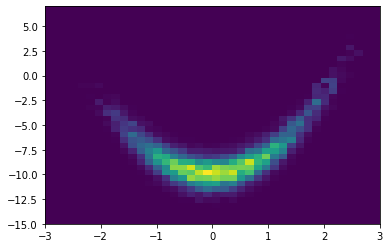

In [196]:
dist = PMP(10000, mu=mu, sigma=sigma,N=3,deep=2)
dist = np.array(dist)
plt.ylim(-15,7)
plt.xlim(-3,3)
plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))

# 结论

从实验可知：对于传统的GMP方法而言，有效样本的质量低于传统的SP采样，并且使用PMP采样所获得样本的质量显著高于传统的SP
即 MP 虽然能并行，但是采样的质量有所降低，PMP不仅能够并行，还能够提升采样的质量！

In [11]:
mu, sigma = 0,1
times = 6
sp = np.empty(times)
mp = np.empty(times)
psp = np.empty(times)
pmp = np.empty(times)
for i in range(times):
    sp[i] = tfp.mcmc.effective_sample_size(tf.convert_to_tensor(SP(160000,mu=mu,sigma=sigma)),filter_beyond_positive_pairs=True)
    mp[i] = tfp.mcmc.effective_sample_size(tf.convert_to_tensor(MP(10000, mu=mu, sigma=sigma, N=15)), filter_beyond_positive_pairs=True)
    psp[i] = tfp.mcmc.effective_sample_size(tf.convert_to_tensor(PSP(10000, mu=mu, sigma=sigma,N=15)), filter_beyond_positive_pairs=True)
print(sp)
print(mp)
print(psp)

100%|██████████| 10000/10000 [01:45<00:00, 94.36it/s]

[269.0328064  280.65100098 338.06616211 354.60131836 262.95153809
 290.7986145 ]
[212.84838528 188.11949803 204.86422331 225.67680558 246.95489469
 248.33185787]
[5619.89606375 4589.55151056 5708.20125161 5442.28463993 5354.99860563
 4830.92501689]


In [12]:

data = np.ones([times,3])
data[:,0]=sp
data[:,1]=mp
data[:,2]=psp
fig = plt.figure(figsize=(3,10))
plt.ylable("ESS")
plt.xlable("Algorithm")
labels = 'SP','MP','PMP'
view = plt.boxplot(data,labels=labels)
plt.savefig("ess.pdf")

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

<Figure size 216x720 with 0 Axes>

In [7]:
longs = [30000,30000,30000]
epoch_size = len(longs)
for i,long in zip(range(epoch_size),longs):

    dist,acc_num = SP(long,mu=mu,sigma=sigma)
    dist = np.array(dist)
    np.save("SP_sample_i_"+str(i),dist)
   
    
    dist = MP(long, mu=mu, sigma=sigma, N=3)
    dist = np.array(dist)
    np.save("MP_samples_i_"+str(i),dist)
    
    
    dist = PMP(long, mu=mu, sigma=sigma,N=3,deep=2)
    dist = np.array(dist)
    np.save("PNP_samples_i_"+str(i),dist)

   


 53%|█████▎    | 15757/30000 [03:46<03:18, 71.62it/s]d:\pycharm\anaconda\envs\36_ygf_base_mcmc\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
d:\pycharm\anaconda\envs\36_ygf_base_mcmc\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
100%|██████████| 30000/30000 [07:15<00:00, 68.90it/s]


100%|██████████| 30000/30000 [08:27<00:00, 59.09it/s]


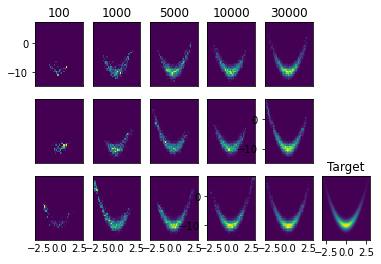

In [6]:

fig = plt.figure()
longs = [100,1000,5000,10000,30000]
epoch_size = len(longs)
for i,long in zip(range(epoch_size),longs):
    ax = fig.add_subplot(3, epoch_size +1, i + 1)
    ax.tick_params(axis='x', which='both', length=0)
    dist,acc_num = SP(long,mu=mu,sigma=sigma)
    dist = np.array(dist)
    plt.xlim(-3,3)
    plt.ylim(-15,7)
    plt.title(str(long))
    plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))
    ax.tick_params(axis='x', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    if i%5 !=0:
        ax.tick_params(axis='y', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        
    ax = fig.add_subplot(3, epoch_size +1, epoch_size+1+i + 1)
    dist = MP(long, mu=mu, sigma=sigma, N=3)
    dist = np.array(dist)
    plt.xlim(-3,3)
    plt.ylim(-15,7)
   
    plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))
    ax.tick_params(axis='x', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    if (epoch_size+1+i )%5 !=0:
        ax.tick_params(axis='y', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        
    ax = fig.add_subplot(3, epoch_size +1, epoch_size+1+epoch_size+1+i + 1)
    if (epoch_size+epoch_size+i + 1)%5 !=0:
        ax.tick_params(axis='y', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.tick_params(axis='x', which='both', length=0)
    dist = PMP(long, mu=mu, sigma=sigma,N=3,deep=2)
    dist = np.array(dist)

    plt.xlim(-3,3)
    plt.ylim(-15,7)
    
    plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))
ax = fig.add_subplot(3, epoch_size +1, 3*(epoch_size+1))  
ax.tick_params(axis='y', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
x1_range = np.linspace(-3, 3, 400)
x2_range = np.linspace(-15, 7, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
X = np.array([X1, X2])
P = banana_distribution(X)

plt.imshow(P, extent=(-3, 3, -15, 7), origin='lower', cmap='viridis', aspect='auto')

plt.xlim(-3,3)
plt.ylim(-15,7)
plt.title('Target')
plt.savefig("banana.pdf")
